<h1>Deception Detection in Online Dating</h1>

<h2>1. Introduction</h2>

The goal of this project is to find features in online dating profiles which can help determine deceptive behavior. Our study assumes that people who are married should'nt be on online dating platforms. This can lead to distrust and cheating on other people which leads to depression and other mental issues.

The dataset we use for this study is - https://github.com/rudeboybert/JSE_OkCupid


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns # data visualization library  
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)



# Loading data
path_file = './src/profiles.csv'

df = pd.read_csv(open(path_file, 'r'))

list_df = []
df = df[df.status != "unknown"]
# df.dropna()
# df = df.rename(columns = {'fit': 'fit_feature'})

df['status'] = df['status'].replace("seeing someone", "married")
df['status'] = df['status'].replace("available", "single")

df['status'] = df['status'].replace("single", 0)
df['status'] = df['status'].replace("married", 1)

# df_single = df[df['status'] == 0].sample(frac=0.04124)
# df_married = df[df['status'] == 1]

# df = pd.concat([df_single, df_married], axis=1)
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,0
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",0
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",0
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",0
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,0


In [73]:
print('Percent of bisexual in Married', 100.0* df[(df.orientation == 'bisexual') & (df.status == 1)].shape[0]/float(df[(df.status==1)].shape[0]))
print('Percent of bisexual in Single', 100.0* df[(df.orientation == 'bisexual') & (df.status == 0)].shape[0]/float(df[(df.status==0)].shape[0]))
print('Percent of straight in Married', 100.0* df[(df.orientation == 'straight') & (df.status == 1)].shape[0]/float(df[(df.status==1)].shape[0]))
print('Percent of straight in Single', 100.0* df[(df.orientation == 'straight') & (df.status == 0)].shape[0]/float(df[(df.status==0)].shape[0]))
df[(df.status == 1)].orientation.value_counts()

print('Percentage of people who do Drugs Somtimes', 100.0* df[(df.drugs == 'sometimes') & (df.status == 1)].shape[0]/float(df[(df.status==1)].shape[0]))
# print(df[(df.status == 1)].drugs.value_counts())

# df[(df.status == 1)].job.value_counts()

Percent of bisexual in Married 14.785172704296546
Percent of bisexual in Single 4.197213439421841
Percent of straight in Married 72.24094355518113
Percent of straight in Single 86.65786456342727
Percentage of people who do Drugs Somtimes 20.93513058129739


In [76]:

target_count = df[(df.status==1)].orientation.value_counts()

pie_trace = go.Pie(labels=target_count.index, values=target_count.values)
layout = dict(title= "Married Orientation distribution", height=400, width=800)
fig = dict(data=[pie_trace], layout=layout)
iplot(fig)


In [77]:
target_count = df[(df.status==0)].orientation.value_counts()

pie_trace = go.Pie(labels=target_count.index, values=target_count.values)
layout = dict(title= "Single Orientation distribution", height=400, width=800)
fig = dict(data=[pie_trace], layout=layout)
iplot(fig)

In [80]:
target_count = df[(df.status==0)].drugs.value_counts()

pie_trace = go.Pie(labels=target_count.index, values=target_count.values)
layout = dict(title= "Married Drug Usage distribution", height=400, width=800)
fig = dict(data=[pie_trace], layout=layout)
iplot(fig)

In [81]:
target_count = df[(df.status==1)].drugs.value_counts()

pie_trace = go.Pie(labels=target_count.index, values=target_count.values)
layout = dict(title= "Married Drug Usage distribution", height=400, width=800)
fig = dict(data=[pie_trace], layout=layout)
iplot(fig)

In [82]:
target_count = df[(df.status==1)].body_type.value_counts()

pie_trace = go.Pie(labels=target_count.index, values=target_count.values)
layout = dict(title= "Married Body_type distribution", height=400, width=800)
fig = dict(data=[pie_trace], layout=layout)
iplot(fig)

In [83]:
target_count = df[(df.status==0)].body_type.value_counts()

pie_trace = go.Pie(labels=target_count.index, values=target_count.values)
layout = dict(title= "Married Body_type distribution", height=400, width=800)
fig = dict(data=[pie_trace], layout=layout)
iplot(fig)

In [39]:

for columns in df.columns:
    # skipping essay, last online time, language and status
    if columns.startswith('ethnicity') or columns.startswith('location') or columns.startswith('essay') or columns.startswith('last_online') or columns.startswith('speaks') or columns.startswith('status'):
        continue
    else:
        list_df.append(pd.get_dummies(df[columns], prefix=columns))
        print(columns, pd.get_dummies(df[columns]).shape[1])

df_np = np.asarray(list_df)

features = pd.concat(df_np, axis=1)

labels = df['status']
feature_list = list(features.columns)


target_count = labels.value_counts()

pie_trace = go.Pie(labels=target_count.index, values=target_count.values)
layout = dict(title= "Single to Married distribution", height=400, width=800)
fig = dict(data=[pie_trace], layout=layout)
iplot(fig)


age 54
body_type 12
diet 18
drinks 6
drugs 3
education 32
height 60
income 13
job 21
offspring 15
orientation 3
pets 15
religion 45
sex 2
sign 48
smokes 5


In [36]:

train_features, test_features, train_labels, test_labels = train_test_split(features.as_matrix(), labels, test_size=0.10, random_state=42, stratify=labels)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

rf = RandomForestClassifier(n_estimators=10000, random_state=42, verbose=1, max_depth=10)

rf.fit(train_features, train_labels)

Training Features Shape: (53942, 352)
Training Labels Shape: (53942,)
Testing Features Shape: (5994, 352)
Testing Labels Shape: (5994,)


[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed: 15.8min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=42, verbose=1, warm_start=False)

In [37]:

y_pred = rf.predict(test_features)
from sklearn.metrics import classification_report
target_names = ['single','married']
print(classification_report(test_labels, y_pred, target_names=target_names))

             precision    recall  f1-score   support

     single       0.96      1.00      0.98      5757
    married       0.00      0.00      0.00       237

avg / total       0.92      0.96      0.94      5994



[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    9.0s finished
C:\Users\shaurya\AppData\Local\conda\conda\envs\pythopn3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [45]:
set(y_pred)



(2767, 31)

In [40]:

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
print("Feature ranking:")
sort_features = []
sorted_importances = []
for f in range(train_features.shape[1]):
    print(f + 1, feature_list[indices[f]], importances[indices[f]])
    sort_features.append(feature_list[indices[f]])
    sorted_importances.append(importances[indices[f]])


Feature ranking:
1 orientation_bisexual 0.0467682313908
2 orientation_straight 0.035082233733
3 drugs_sometimes 0.0162893133741
4 body_type_athletic 0.0155603970573
5 diet_mostly anything 0.0153558977951
6 job_computer / hardware / software 0.0146424518523
7 pets_likes dogs and has cats 0.014613671233
8 sex_m 0.0141597577446
9 offspring_doesn&rsquo;t want kids 0.0139219160691
10 sex_f 0.0138323579483
11 income_20000 0.01200169707
12 religion_atheism and somewhat serious about it 0.0119026665379
13 drugs_never 0.0116333085764
14 offspring_doesn&rsquo;t have kids 0.0106994147292
15 drinks_socially 0.0102413229587
16 pets_likes dogs and likes cats 0.0100861645068
17 orientation_gay 0.00957440344185
18 income_-1 0.00908997926144
19 smokes_no 0.00887861433396
20 education_graduated from college/university 0.00882164390003
21 body_type_fit 0.00867188577973
22 drinks_rarely 0.00837588667625
23 pets_likes cats 0.00758655421566
24 body_type_average 0.00753662358775
25 education_working on colle

In [50]:
sort_features


['orientation_bisexual',
 'orientation_straight',
 'drugs_sometimes',
 'body_type_athletic',
 'diet_mostly anything',
 'job_computer / hardware / software',
 'pets_likes dogs and has cats',
 'sex_m',
 'offspring_doesn&rsquo;t want kids',
 'sex_f',
 'income_20000',
 'religion_atheism and somewhat serious about it',
 'drugs_never',
 'offspring_doesn&rsquo;t have kids',
 'drinks_socially',
 'pets_likes dogs and likes cats',
 'orientation_gay',
 'income_-1',
 'smokes_no',
 'education_graduated from college/university',
 'body_type_fit',
 'drinks_rarely',
 'pets_likes cats',
 'body_type_average',
 'education_working on college/university',
 'drinks_often',
 'religion_atheism and very serious about it',
 'job_science / tech / engineering',
 'pets_has dogs and has cats',
 'religion_atheism and laughing about it',
 'religion_other and laughing about it',
 'age_32',
 'age_28',
 'body_type_curvy',
 'religion_agnosticism and laughing about it',
 'age_26',
 'height_66.0',
 'job_other',
 'height_62

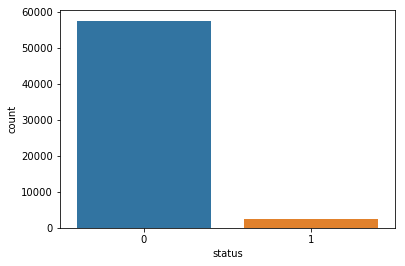

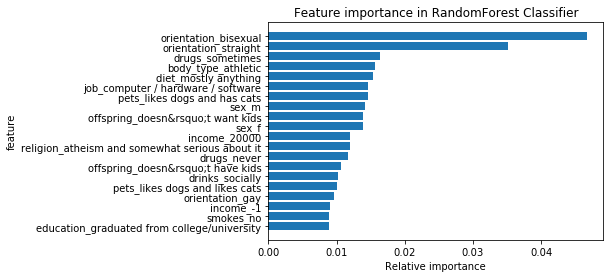

In [67]:

# plt.figure()
# plt.title("Feature importances")
# plt.bar( range(train_features.shape[1])[:10],importances[indices][:10],
#         color="g", xerr=std[indices][:10], align="center")
# plt.yticks(range(train_features.shape[1])[:10], sort_features)
# # plt.xlim([-1, train_features.shape[1]])
# plt.show()





fig, ax = plt.subplots()
y_pos = np.arange(20)
ax.barh(y_pos, sorted_importances[:20], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(sort_features)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')




plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.show()



In [78]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree
dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in rf.estimators_[:1]:
    export_graphviz(tree_in_forest,out_file='tree.dot',
    feature_names=feature_list,
    filled=True,
    rounded=True)
    (graph,) = pydot.graph_from_dot_file('tree.dot')
    name = 'tree' + str(i_tree)
    graph.write_png(name+  '.png')
    os.system('dot -Tpng tree.dot -o tree.png')
    i_tree +=1

SyntaxError: invalid syntax (<ipython-input-69-119fc3415fc3>, line 1)

In [75]:
import sys
!{sys.executable} -m pip install pydot-ng 

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
